In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
dataset = pd.read_csv('admitance.csv')

In [3]:
dataset

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [4]:
# changing categorical to discrete value
# map function
dataset['Admitted'] = dataset['Admitted'].map({'Yes':1,'No':0})

In [5]:
dataset

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


In [6]:
y = dataset['Admitted']

In [7]:
y

0      0
1      1
2      1
3      0
4      0
      ..
163    1
164    1
165    0
166    0
167    0
Name: Admitted, Length: 168, dtype: int64

In [8]:
x1 = dataset['SAT']

In [9]:
x1

0      1363
1      1792
2      1954
3      1653
4      1593
       ... 
163    1722
164    1750
165    1555
166    1524
167    1461
Name: SAT, Length: 168, dtype: int64

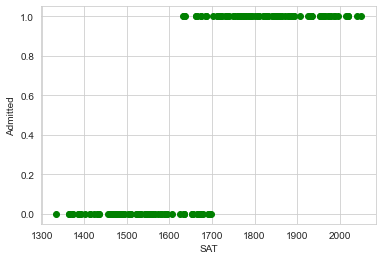

In [10]:
# plot
plt.scatter(x1,y,color='green')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

In [11]:
# linear regression
# just to check
import statsmodels.api as sm

In [12]:
x = sm.add_constant(x1)

In [13]:
x

,const,SAT
0,1.0,1363
1,1.0,1792
2,1.0,1954
3,1.0,1653
4,1.0,1593
...,...,...
163,1.0,1722
164,1.0,1750
165,1.0,1555
166,1.0,1524


In [14]:
x.head(10)

,const,SAT
0,1.0,1363
1,1.0,1792
2,1.0,1954
3,1.0,1653
4,1.0,1593
5,1.0,1755
6,1.0,1775
7,1.0,1887
8,1.0,1893
9,1.0,1580


In [15]:
x.tail(10)

,const,SAT
158,1.0,1555
159,1.0,2020
160,1.0,1593
161,1.0,1934
162,1.0,1808
163,1.0,1722
164,1.0,1750
165,1.0,1555
166,1.0,1524
167,1.0,1461


In [16]:
reg_lin = sm.OLS(y,x).fit()

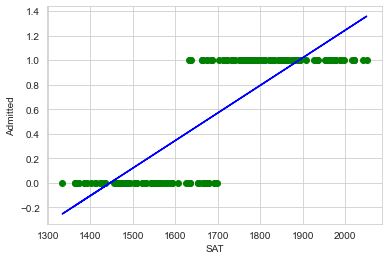

In [17]:
# plot
plt.scatter(x1,y,color='green')
plt.plot(x1,reg_lin.predict(x),color='blue')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

In [18]:
# Logistic Regression

reg_log = sm.Logit(y,x).fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [19]:
reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Wed, 16 Mar 2022   Pseudo R-squ.:                  0.7992
Time:                        19:53:50   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [20]:
# python - define function
def rajat(num):
    return num**2

In [21]:
rajat(5)

25

In [22]:
# probablity at point x
def f(x,b0,b1):
    return np.array(np.exp(b0+b1*x)/(1+np.exp(b0+b1*x)))

In [23]:
f(1600,-69.9128,0.0420)

array(0.06222227)

In [24]:
f(1700,-69.9128,0.0420)

array(0.81565764)

In [25]:
f(1650,-69.9128,0.0420)

array(0.35142074)

In [26]:
f(1660,-69.9128,0.0420)

array(0.45194875)

In [27]:
f(1665,-69.9128,0.0420)

array(0.50429989)

In [28]:
f(1664,-69.9128,0.0420)

array(0.49380032)

# 15_Mar

In [29]:
reg_log.params

const   -69.912802
SAT       0.042005
dtype: float64

In [30]:
reg_log.params[0]

-69.91280217619742

In [31]:
reg_log.params[1]

0.042004866693767774

In [32]:
f(x1,reg_log.params[0],reg_log.params[1])

array([3.17509804e-06, 9.95320711e-01, 9.99994789e-01, 3.82545559e-01,
       4.74688306e-02, 9.78241219e-01, 9.90489815e-01, 9.99913075e-01,
       9.99932439e-01, 2.80555331e-02, 9.99693576e-01, 9.99883365e-01,
       4.95824098e-01, 3.31130788e-06, 7.68780343e-01, 9.99588875e-01,
       2.11008877e-01, 2.18086901e-01, 2.32751342e-01, 9.99666730e-01,
       9.99998697e-01, 9.99999144e-01, 3.78484857e-05, 1.40058570e-03,
       9.11780281e-01, 9.99878362e-01, 2.18086901e-01, 9.96920696e-01,
       9.99571245e-01, 9.84988046e-01, 1.86723145e-04, 6.09532977e-01,
       4.12717426e-01, 9.99999674e-01, 9.99588875e-01, 9.99781012e-01,
       4.95824098e-01, 9.99836790e-01, 3.92515016e-01, 1.11951035e-05,
       3.72881439e-02, 1.97361936e-01, 9.99986307e-01, 4.26043595e-06,
       9.97797608e-01, 2.70466415e-05, 9.83006220e-01, 3.81272805e-04,
       5.56342322e-04, 1.28281107e-02, 7.78868807e-03, 9.99999908e-01,
       7.97292345e-01, 6.06406209e-03, 9.99987928e-01, 7.99999369e-06,
      

In [33]:
f(x1,reg_log.params[0],reg_log.params[1]).round(0)

array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0.])

In [34]:
f(x1,reg_log.params[0],reg_log.params[1]).round()

array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0.])

In [35]:
# sorting
f_sort = np.sort(f(x1,reg_log.params[0],reg_log.params[1]))

In [36]:
f_sort.round()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [37]:
x1

0      1363
1      1792
2      1954
3      1653
4      1593
       ... 
163    1722
164    1750
165    1555
166    1524
167    1461
Name: SAT, Length: 168, dtype: int64

In [38]:
x_sorted =np.sort(np.array(x1))

In [39]:
x_sorted

array([1334, 1363, 1364, 1370, 1374, 1385, 1387, 1393, 1402, 1412, 1414,
       1422, 1430, 1435, 1435, 1455, 1460, 1461, 1464, 1464, 1469, 1473,
       1475, 1475, 1477, 1478, 1481, 1486, 1487, 1492, 1494, 1502, 1508,
       1508, 1510, 1521, 1524, 1526, 1531, 1532, 1542, 1543, 1549, 1550,
       1550, 1550, 1555, 1555, 1557, 1561, 1565, 1572, 1579, 1580, 1587,
       1591, 1593, 1593, 1607, 1625, 1631, 1633, 1634, 1634, 1634, 1634,
       1636, 1653, 1654, 1656, 1662, 1663, 1664, 1664, 1666, 1670, 1674,
       1674, 1675, 1679, 1685, 1687, 1687, 1690, 1693, 1697, 1702, 1712,
       1714, 1715, 1720, 1720, 1721, 1722, 1730, 1735, 1735, 1741, 1750,
       1755, 1760, 1761, 1764, 1764, 1769, 1773, 1775, 1775, 1777, 1778,
       1781, 1786, 1787, 1792, 1794, 1802, 1808, 1808, 1810, 1821, 1824,
       1826, 1831, 1832, 1842, 1843, 1849, 1850, 1850, 1850, 1855, 1855,
       1857, 1861, 1865, 1872, 1879, 1880, 1887, 1891, 1893, 1893, 1907,
       1925, 1931, 1933, 1934, 1934, 1934, 1936, 19

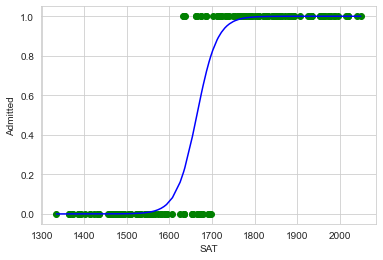

In [40]:
plt.scatter(x1,y,color='green')
plt.plot(x_sorted,f_sort,color='blue')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

In [41]:
# prediction

f_pred = reg_log.predict(x)

In [42]:
f_pred = np.sort(np.array(f_pred))

In [43]:
f_pred.round()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

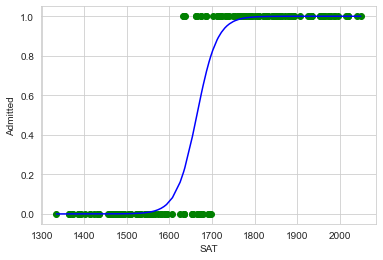

In [44]:
plt.scatter(x1,y,color='green')
plt.plot(x_sorted,f_pred,color='blue')
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show()

# 16.03.2022
# sklearn


In [45]:
dataset

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


In [46]:
X = dataset['SAT']

In [47]:
X.shape

(168,)

In [57]:
# convert into array
X = np.array(X).reshape(-1,1)

In [58]:
X.shape

(168, 1)

In [59]:
y= dataset['Admitted']

In [60]:
y

0      0
1      1
2      1
3      0
4      0
      ..
163    1
164    1
165    0
166    0
167    0
Name: Admitted, Length: 168, dtype: int64

In [61]:
# sklearn for train_test_split
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [63]:
X_train.shape

(134, 1)

In [64]:
X_test.shape

(34, 1)

In [65]:
# sklearn for model training
from sklearn.linear_model import LogisticRegression

In [66]:
model = LogisticRegression()

In [68]:
model.fit(X_train,y_train)

LogisticRegression()

# evaluating test data

In [69]:
# actual value
y_test

151    1
56     0
123    0
60     0
100    1
51     1
7      1
5      1
86     0
135    0
54     1
94     0
157    1
101    0
73     1
45     0
74     1
97     0
139    0
96     1
107    1
106    1
150    1
166    0
55     0
152    1
26     1
143    1
155    0
33     1
8      1
108    0
122    0
37     1
Name: Admitted, dtype: int64

In [71]:
# predicted value
y_pred =model.predict(X_test)

In [72]:
y_pred

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [73]:
# sklearn for confussion matrices

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
print(confusion_matrix(y_test,y_pred))

[[14  1]
 [ 1 18]]


In [76]:
# for report
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.95      0.95      0.95        19

    accuracy                           0.94        34
   macro avg       0.94      0.94      0.94        34
weighted avg       0.94      0.94      0.94        34

